# Big Data Analysis Project - Data Exploratory Analysis

### This is a course project for Concordia's Bigdata class (SOEN691 UU) by Dr. Tristan Glatard in Winter 2020.
*Team Members:*
- Le, Manh Quoc Dat (Student ID: 40153127)<br />
- Tran, Trong Tuan (Student ID: 40151694)<br />
- Phan, Vu Hong Hai (Student ID: 40154023)<br />
- Zhang, Yefei (Student ID: 40153319)<br />

Main project repository: https://github.com/HongHaiPV/concordia-bigdata-project <br />
Datasource: https://sites.google.com/eng.ucsd.edu/fitrec-project/home <br />
>Jianmo Ni, Larry Muhlstein, and Julian McAuley. 2019. Modeling Heart Rate and Activity Data for Personalized Fitness Recommendation. In Proceedings of the 2019 World Wide Web Conference (WWW’19), May 13–17, 2019, San
Francisco, CA, USA. ACM, New York, NY, USA, 11 pages. https://doi.org/10.1145/3308558.3313643
<br />

*The purpose of exploratory analysis is to have an insight of the data set and some initial visual inference, as well as looking for missing data & data imbalance.*

### Preparation - Project framework
We use the same Python version 3.5 as in the course's lab assignments, and the project will also base on PySpark as the main framework to work with the big data set. For the detailed python enviroment and package setup, please follow the guide from the lab: https://github.com/azazel7/BigData-Lab/blob/master/installation_guides/guide.md <br />
We also use Matplotlib as the main package for plotting.

### A. Initialize pyspark framework and load data into pyspark's dataframe
Import necessary modules/ libraries for use later and load the data set into spark dataframe:<br />
   *(Note: the raw data and metadata files are download from the source above, unzipped and put into 'data' folder)*

In [1]:
import os
import sys
import pyspark
from pyspark.rdd import RDD
from pyspark.sql import Row
from pyspark.sql import DataFrame
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext
from pyspark.sql import functions
from pyspark.sql.functions import lit
from pyspark.sql.functions import desc
from pyspark.sql.functions import col
from pyspark.sql.functions import size
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import math
from IPython.core.interactiveshell import InteractiveShell
import matplotlib
InteractiveShell.ast_node_interactivity = "all" # This helps auto print out the items without explixitly using 'print'
%matplotlib inline

# Initialize a spark session.
conf = pyspark.SparkConf().setMaster("local[*]")\
        .set('spark.executor.heartbeatInterval', 10000)\
        .set('spark.network.timeout', 10000)
def init_spark():
    spark = SparkSession \
        .builder \
        .appName("BigData Project - Exploratory Analysis") \
        .config(conf=conf) \
        .getOrCreate()
    return spark

spark = init_spark()
filename_data = './data/endomondoHR.json'
#filename_metadata = './data/endomondoMeta.json'
# Load the main data set into pyspark data frame 
df = spark.read.json(filename_data, mode="DROPMALFORMED")

# Load meta data file into pyspark data frame as well
#df_meta = spark.read.json(filename_metadata, mode="DROPMALFORMED")
print('Data frame type: ' + str(type(df)))


Data frame type: <class 'pyspark.sql.dataframe.DataFrame'>


### B. Let's have an overview of the raw data set
#### 1) Columns & types of the data set:
   *The data set has both single value columns (int, string) and column made of arrays/list.*

In [2]:
print('Columns & datatypes:')
DataFrame(df.dtypes, columns =['Column Name','Data type'])


Columns & datatypes:


Column Name      Data type
0     altitude  array<double>
1       gender         string
2   heart_rate  array<bigint>
3           id         bigint
4     latitude  array<double>
5    longitude  array<double>
6        speed  array<double>
7        sport         string
8    timestamp  array<bigint>
9          url         string
10      userId         bigint

#### 2) Data set description and display the first 2 rows:
*Note: The describe function auto exlcuded the columns with list/ array type.<br />Based on the column type, data frame description and the first 2 rows, we know that each data row is a record of a workout of a single user, with the associated activity type (`sport`) and orther data like heart rates, locations and record times (`timestamp`).*

In [3]:
print('Data frame describe (string and numeric columns only):')
df.describe().toPandas()

print('\nFisrt 2 data rows:')
df.limit(2).toPandas()

Data frame describe (string and numeric columns only):


summary   gender                   id     sport  \
0   count   253020               253020    253020   
1    mean     None  3.566244412926132E8      None   
2  stddev     None  1.574845634895318E8      None   
3     min   female                99296  aerobics   
4     max  unknown            674008008      yoga   

                                                 url              userId  
0                                             253020              253020  
1                                               None   4619648.939783417  
2                                               None  3932877.7296880507  
3  https://www.endomondo.com/users/10014612/worko...                  69  
4  https://www.endomondo.com/users/9991401/workou...            15481421


Fisrt 2 data rows:


altitude gender  \
0  [41.6, 40.6, 40.6, 38.4, 37.0, 34.0, 34.0, 34....   male   
1  [38.4, 39.0, 39.0, 38.2, 36.8, 36.8, 36.8, 35....   male   

                                          heart_rate         id  \
0  [100, 111, 120, 119, 120, 116, 125, 128, 131, ...  396826535   
1  [100, 105, 111, 110, 108, 115, 126, 130, 132, ...  392337038   

                                            latitude  \
0  [60.173348765820265, 60.173239801079035, 60.17...   
1  [60.173247596248984, 60.17320962622762, 60.172...   

                                           longitude  \
0  [24.64977040886879, 24.65014273300767, 24.6509...   
1  [24.649855233728886, 24.65015547350049, 24.650...   

                                               speed sport  \
0  [6.8652, 16.4736, 19.1988, 20.4804, 31.3956, 3...  bike   
1  [9.0792, 13.284, 15.9336, 10.9476, 16.1676, 30...  bike   

                                           timestamp  \
0  [1408898746, 1408898754, 1408898765, 140889877...   
1  [1408221682, 1408221687, 1408221699, 140822170...   

                                                 url    userId  
0  https://www.endomondo.com/users/10921915/worko...  10921915  
1  https://www.endomondo.com/users/10921915/worko...  10921915

#### 3) Check for missing values and abnormal zeroes
After having a first sight of the columns, the first thing we should check is if the data set having any missing value.
- For string columns, we check for `None` and `null`
- For numeric columns, we check for zeroes and `NaN`
- For array type columns, we check if the array contain zeroes or `NaN`

In [64]:
from pyspark.sql.functions import array_contains, isnan
string_columns = ['gender', 'sport', 'url']
numeric_columns = ['id','userId']
array_columns = ['altitude', 'heart_rate', 'latitude', 'longitude', 'speed', 'timestamp']
missing_values = {}
for index, column in enumerate(df.columns):
    if column in string_columns:
        missing_count = df.filter(col(column).eqNullSafe(None) | col(column).isNull()).count()
        missing_values.update({column: missing_count})
    if column in numeric_columns:
        missing_count = df.where(col(column).isin([0, None, np.nan])).count()
        # | col(column).eqNullSafe(float('NaN'))
        # col(column) == 0 | 
        missing_values.update({column: missing_count})
    if column in  array_columns:
        missing_count = df.filter(array_contains(df[column], 0) | array_contains(df[column], np.nan)).count()
        missing_values.update({column: missing_count})
        
print('Missing values across columns in the data set:')
missing_df = pd.DataFrame.from_dict([missing_values])
missing_df.index = ['Missing value records count']
missing_df

Missing values across columns in the data set:


altitude  gender  heart_rate  id  latitude  \
Missing value records count     40848       0        1280   0       113   

                             longitude  speed  sport  timestamp  url  userId  
Missing value records count        113   7741      0          0    0       0

The result showed that there are a lot of workouts with missing data or zeroes. For `altitude` column it might be normal (since the altitude is compared to sea level so its values can be positive or negative numbers), but for the remaining column, those records will need to be removed from the data set [1]

#### 4) High level summary on data set
After the brief overview of what the columns look like, next we will have some insight on users count, activity (sport) type counts and genders, and also total activities (workouts) taken by each gender.<br />
*we will also look further into each datarow and observe how many data points were recorded per activity (workout). The new column `PerWorkoutRecordCount` is determine by the size, or number of elements of the list in `timestamp` column of each row.*<br />
*A notice is that there were some activities without clear info about gender (recorded as `unknown`).*

In [4]:
# Create new column 'PerWorkoutRecordCount' to count the number of timestamps recorded per row/workout
df = df.withColumn('PerWorkoutRecordCount', size(col('timestamp')))
print('New PerWorkoutRecordCount column (first 5 rows):')
df.select('userId', 'id', 'sport', 'timestamp', 'PerWorkoutRecordCount').limit(5).toPandas()

# This part is writen as a function to be used again later
def user_activity_workout_summarize(df):
    user_count = format(df.select('userId').distinct().count(), ',d')
    workout_count = format(df.select('id').distinct().count(), ',d')
    activity_count = str(df.select('sport').distinct().count())
    sum_temp = df.agg(functions.sum('PerWorkoutRecordCount')).toPandas()
    total_records_count = format(sum_temp['sum(PerWorkoutRecordCount)'][0],',d')
    columns=['Users count', 'Activity types count','Workouts count', 'Total records count']
    data = [[user_count], [activity_count], [workout_count], [total_records_count]]
    sum_dict = {column: data[i] for i, column in enumerate(columns)}
    sum_df = pd.DataFrame.from_dict(sum_dict)[columns]
    gender_user_count = df.select('gender','userId').distinct().groupBy('gender').count().toPandas()
    gender_activities_count = df.groupBy('gender').count().toPandas()
    gender_user_activity_count = gender_user_count.join(gender_activities_count.set_index('gender'), on='gender'
                                                        , how='inner', lsuffix='_gu')
    gender_user_activity_count.columns = ['Gender', '# of users', 'Activities (workouts) count']
    
    return sum_df, gender_user_activity_count

sum_dfs= user_activity_workout_summarize(df)
print('\nOverall data set summary on users, activities(workouts) and number of fitness records:')
sum_dfs[0]
print('\nSummarize on genders:')
sum_dfs[1]
print('\nStatistic summary of the PerWorkoutRecordCount column:')
df.select('PerWorkoutRecordCount').toPandas().describe()


New PerWorkoutRecordCount column (first 5 rows):


userId         id             sport  \
0  10921915  396826535              bike   
1  10921915  392337038              bike   
2  10921915  389643739              bike   
3  10921915  386729739              bike   
4  10921915  383186560  bike (transport)   

                                           timestamp  PerWorkoutRecordCount  
0  [1408898746, 1408898754, 1408898765, 140889877...                    500  
1  [1408221682, 1408221687, 1408221699, 140822170...                    500  
2  [1407858459, 1407858466, 1407858478, 140785849...                    500  
3  [1407432042, 1407432048, 1407432056, 140743206...                    500  
4  [1406909434, 1406909436, 1406909437, 140690943...                    500


Overall data set summary on users, activities(workouts) and number of fitness records:


Users count Activity types count Workouts count Total records count
0       1,104                   49        253,020         111,541,956


Summarize on genders:


Gender  # of users  Activities (workouts) count
0  unknown          15                         1942
1   female         110                        15959
2     male         979                       235119


Statistic summary of the PerWorkoutRecordCount column:


PerWorkoutRecordCount
count          253020.000000
mean              440.842447
std               125.161382
min                 1.000000
25%               495.000000
50%               500.000000
75%               500.000000
max               500.000000

*From the statistic summary of the `PerWorkoutRecordCount` column, we saw that up to 75% of the workouts in the data set contain 495 to 500 data records (timestamps). There are some workouts having as little as only a single record, which would make no meaning to be counted into the data set and be used as training/test data. **So the first filtering we will apply is to filter out any row with less than 50 timestamps recorded.** [1]*
<br />

#### 4) Summarize on gender distribution by activities:
  *As shown in the previous high level summary, there are totally 49 kinds of sports (activity types) in this dataset, from the detailed table below, we can see that most of the recorded workouts happened on a few common sports only like run, walk, biking, etc..<br />
  Moreover, in addition to summary tables, we will also have look at a plot from now to have a more visualized feel.*


List of all activities:


sport  count                
gender                          female    male unknown
0                      aerobics      3      43       0
1                     badminton      0      17       0
2                    basketball      0      14       0
3              beach volleyball      0       2       0
4                          bike   4172   92966     863
5              bike (transport)    414   10030       1
6              circuit training     22     196       0
7                      climbing      1       5       0
8       core stability training    143    1103      16
9          cross-country skiing    194     755       0
10                      dancing      0       0       1
11              downhill skiing      2     142       0
12                   elliptical     38      45       0
13              fitness walking    173     228       1
14                         golf      0      12       0
15                   gymnastics      4     157       1
16                       hiking     71     286       0
17             horseback riding      8       8       0
18               indoor cycling    148    2444      14
19                     kayaking      2     253       0
20                 kite surfing      0       1       0
21                 martial arts      0       5       0
22                mountain bike    353   12782     375
23                 orienteering     70    1127       0
24                      pilates      2       5       0
25                roller skiing      6     402       0
26                       rowing     39      88       0
27                        rugby      0       7       0
28                          run   9360  107882     660
29                      sailing      0       2       0
30                 scuba diving      0       1       0
31                        skate     42     470       0
32                skateboarding      0       1       0
33                 snowboarding      0       5       0
34                  snowshoeing      8      24       0
35                       soccer      1      70       0
36                       squash      0       1       0
37                stair climing      7       6       0
38                 step counter      0       2       0
39                     swimming      4      29       8
40                 table tennis      0       5       0
41                       tennis      0       8       0
42            treadmill running     14      56       0
43            treadmill walking      0       2       0
44                         walk    626    3204       1
45              weight training     19     217       1
46                   wheelchair      0       1       0
47                  windsurfing      0       1       0
48                         yoga     13       9       0


Summarized activity participation by percentage of gender:


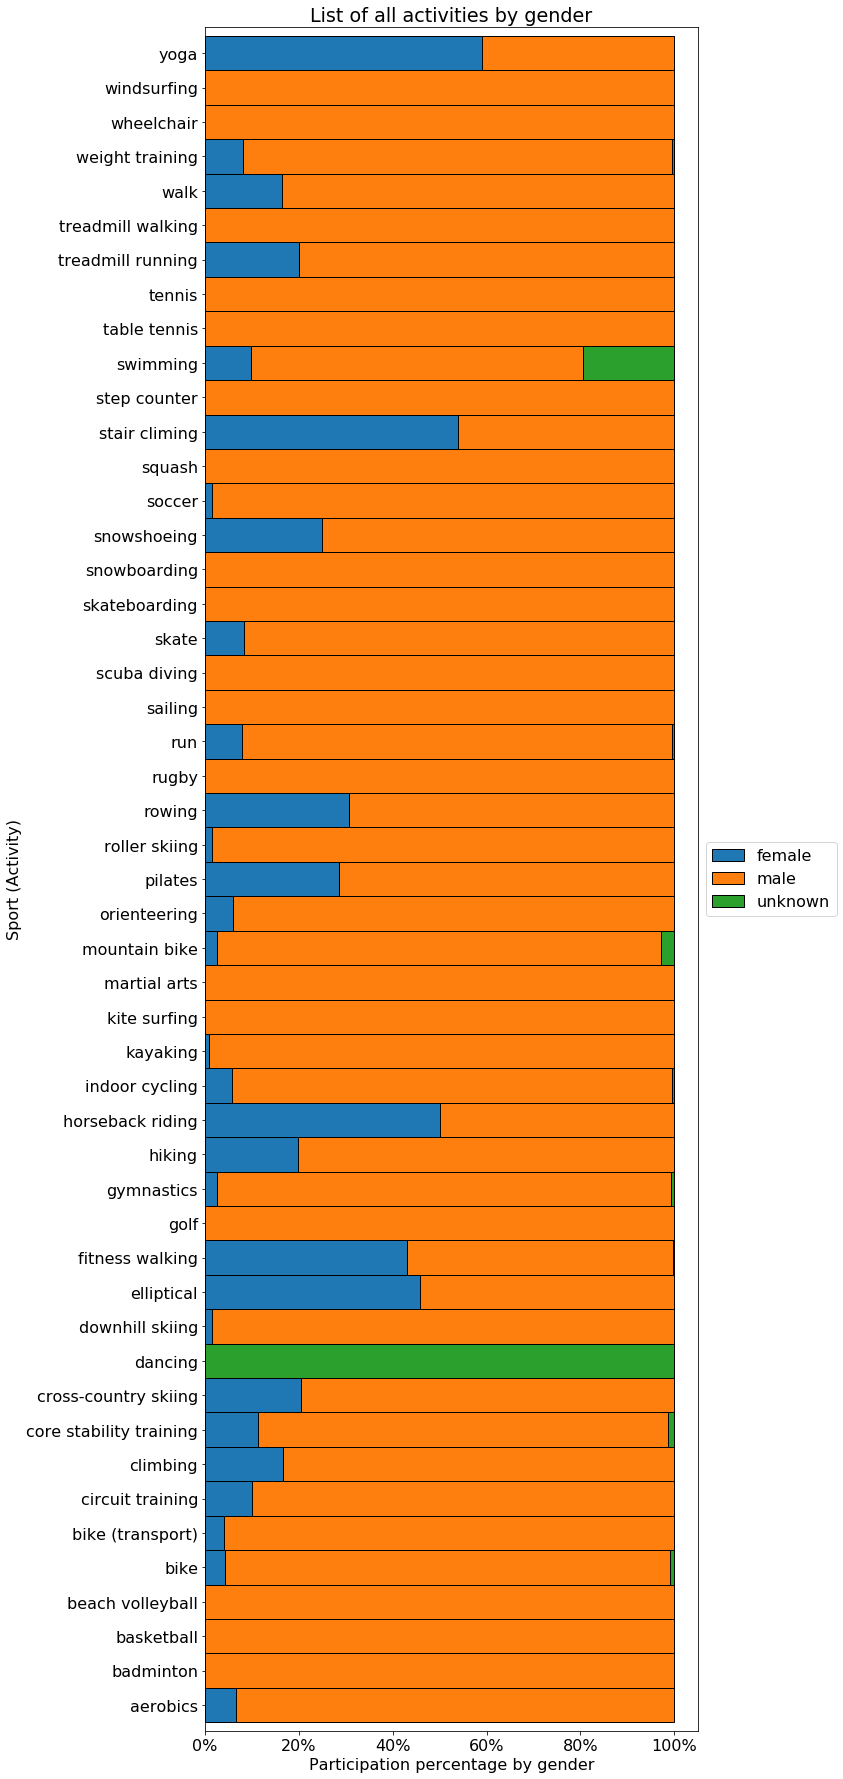

In [17]:
print('\nList of all activities:')

activities_by_gender = df.groupBy('sport', 'gender').count().toPandas()
activities_by_gender_sum = activities_by_gender.set_index(['sport','gender']).unstack(level='gender'
                                                                                      , fill_value=0).reset_index()
activities_by_gender_sum
print('\nSummarized activity participation by percentage of gender:')
fig = plt.figure(figsize=(12, 25))
grid_size = (1,1);
ax = plt.subplot2grid(grid_size, (0,0), colspan=1, rowspan=1)
# source1: http://queirozf.com/entries/pandas-dataframe-plot-examples-with-matplotlib-pyplot#stacked-bar-plot-with-group-by
# source2: https://towardsdatascience.com/a-guide-to-pandas-and-matplotlib-for-data-exploration-56fad95f951c
plot = activities_by_gender.groupby(['sport', 'gender']).agg(np.mean).groupby(level=0).apply(
    lambda x: 100 * x / x.sum()).unstack().plot(kind='barh', stacked=True, width=1
                , edgecolor='black', ax=ax, title='List of all activities by gender');
a = plt.ylabel('Sport (Activity)');
b = plt.xlabel('Participation percentage by gender');
c = plt.legend(sorted(activities_by_gender['gender'].unique()), loc='center left', bbox_to_anchor=(1.0, 0.5));
d = plt.rcParams.update({'font.size': 16});
ax = plt.gca()
e = ax.xaxis.set_major_formatter(mtick.PercentFormatter());
a = fig.tight_layout()
plt.show()

#### 5) Distribution of records count per workout

*For a more detailed observation, we break down the record count per activity into each individual sport. <br />Based on the distribution, the maximum records per workout is 500, but not all workouts and sport types reach that number.*


Plot of workouts distribution by activity type:


C:\Anaconda2\envs\bigdata-lab\lib\site-packages\pandas\plotting\_core.py:2396: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  yrot=yrot, **kwds)


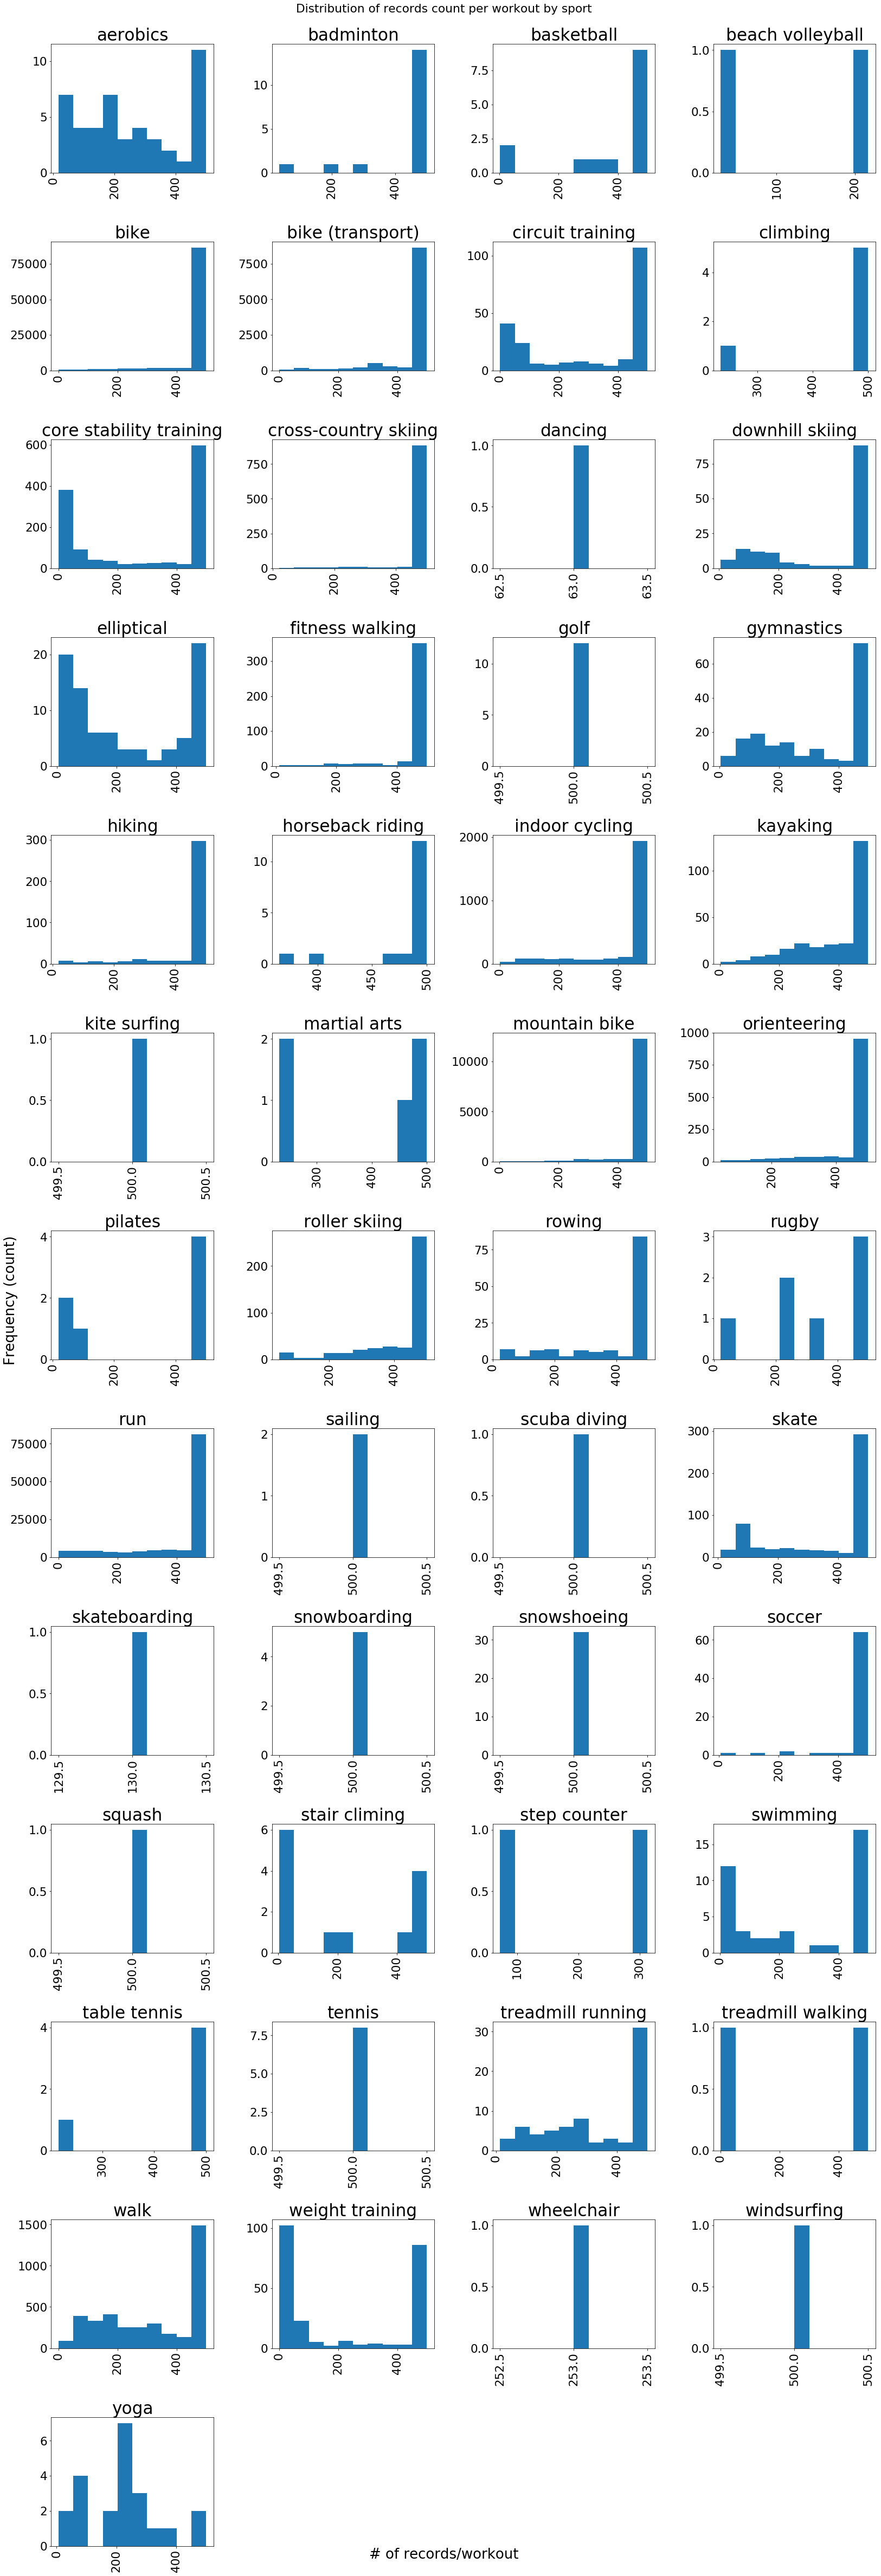

In [6]:
print('\nPlot of workouts distribution by activity type:')
plot_size_x, plot_size_y = 5, 5
figsize_x, figsize_y = plot_size_x * 4 + 3, plot_size_y * 13 + 1
fig = plt.figure(figsize=(figsize_x, figsize_y)) #
grid_size = (13,4)
ax = plt.subplot2grid(grid_size, (0,0), colspan=1, rowspan=1)

PerWorkoutRecordCount_dist = df.select('PerWorkoutRecordCount', 'sport').toPandas().hist(
    column='PerWorkoutRecordCount', bins=10, sharex = False, grid=True
    , xlabelsize='small', ylabelsize='small', by='sport', ax = ax,
    layout = grid_size, figsize=(plot_size_x,plot_size_y)
    )
a = fig.tight_layout()
fig.text(0.5, 1, 'Distribution of records count per workout by sport', ha='center', 
         fontsize='small', transform=fig.transFigure);
fig.text(0.5, 0.01, '# of records/workout', va='bottom', ha='center', transform=fig.transFigure);
fig.text(0.01, 0.5, 'Frequency (count)', va='center', rotation='vertical');

### C. It's all about TIME
Since heart rate prediction through time is a problem of time series analysis, we will need to look at the `timestamp` column carefully to understand and have a proper data preparation, as well as find hints for prediction algorithm/ technique selection.  

#### 1) Creating some derived data from `timestamp`
As seen beforem `timestamp` column contains records of timestamp series of a single workout (a data row) and is stored in UNIX timestamp format. To have more insights on this column, we will create 4 more columns from it:  
- `date_time`: Convert UNIX timestamp into python's datetime format   
*A little note is that since the Endomondo time window is different with Unix time, so in order to retrieve the proper utc time, we need to minus 7 hours from the converted datetime*
- `duration`: Total time of a single workout, in minute    
  *In order to get the workout `duration`, we get the difference between max and min of the datetime list of each workout.*
- `workout_start_time`: Determine when, which hour of the day a workout start  
  *For `workout_start_time`, it's the hour part of the first datetime record of a workout.*
- `interval`: List of time lapses between each single timestamp record in a single workout, in second   
  *And for `interval`, we will calculate it by taking the difference between 2 consecutive timestamp records within a workout.*


In [66]:
from datetime import *
from pyspark.sql.types import *
from pyspark.sql.functions import udf, hour
import statistics as stats

# Support function to convert a timestamp column into Datetime.Datetime, to be used for .withColumn function later
def to_time(timestamp_list):
    # convert to datetime and minus 7 hours due to the difference in Endomondo time window
    return [datetime.fromtimestamp(t) - timedelta(hours=7) for t in timestamp_list]

# Register the support function 'to_time' as a user defined function into pyspark framework
udf_to_time = udf(to_time, ArrayType(elementType=TimestampType()))

# Support function to get the duration (in minutes) of a list of datetime values, to be used for withColumn function later
def get_duration(datetime_list):
    time_dif = max(datetime_list) - min(datetime_list)
    return time_dif.seconds/60

# Register the support function 'get_duration' as a user defined function into pyspark framework
udf_get_duration = udf(get_duration, FloatType())

# Support function to get the workout start time of the datetime list, to be used for withColumn function later
def get_start_time(datetime_list):
    return min(datetime_list)

# Register the support function 'get_start_time' as a user defined function into pyspark framework
udf_get_start_time = udf(get_start_time, TimestampType())

# Support function to get list of intervals within a workout
def get_interval(datetime_list):
    if len(datetime_list) == 1:
        return [0]
    else:
        interval_list = []
        for i in range(0, len(datetime_list)-1):
            interval = (datetime_list[i+1] - datetime_list[i]).seconds
            interval_list.append(interval)
            # print((datetime_list[i+1] - datetime_list[i]).microseconds)
        return interval_list

# Register the support function 'get_interval' as a user defined function into pyspark framework    
udf_get_interval = udf(get_interval, ArrayType(elementType=IntegerType()))

# Create new 'date_time' column to convert from timestamp into python's datetime format for later usage
df = df.withColumn('date_time', 
    udf_to_time('timestamp'))

# Create 'workout_start_time' column to get the start time of each workout/row:
df = df.withColumn('workout_start_time', hour(udf_get_start_time('date_time')))

# Create duration column from the date_time column just created, using the udf function udf_get_duration defined above
df = df.withColumn('duration', udf_get_duration('date_time'))

# Create interval column from the date_time column, using the udf function udf_get_interval defined above
df = df.withColumn('interval', udf_get_interval('date_time'))

print('New columns (''date_time'', ''workout_start_time'' in hour\
, ''duration'' in minutes & ''interval'' in seconds), first 5 rows:')
df.select('timestamp','date_time', 'workout_start_time', 'duration', 'interval').limit(5).toPandas()



New columns (date_time, workout_start_time in hour, duration in minutes & interval in seconds), first 5 rows:


timestamp  \
0  [1408898746, 1408898754, 1408898765, 140889877...   
1  [1408221682, 1408221687, 1408221699, 140822170...   
2  [1407858459, 1407858466, 1407858478, 140785849...   
3  [1407432042, 1407432048, 1407432056, 140743206...   
4  [1406909434, 1406909436, 1406909437, 140690943...   

                                           date_time  workout_start_time  \
0  [2014-08-24 05:45:46, 2014-08-24 05:45:54, 201...                   5   
1  [2014-08-16 09:41:22, 2014-08-16 09:41:27, 201...                   9   
2  [2014-08-12 04:47:39, 2014-08-12 04:47:46, 201...                   4   
3  [2014-08-07 06:20:42, 2014-08-07 06:20:48, 201...                   6   
4  [2014-08-01 05:10:34, 2014-08-01 05:10:36, 201...                   5   

     duration                                           interval  
0  126.483330  [8, 11, 13, 16, 6, 23, 16, 23, 29, 23, 24, 24,...  
1   74.000000  [5, 12, 8, 4, 5, 6, 4, 4, 5, 13, 7, 17, 4, 10,...  
2  112.483330  [7, 12, 12, 16, 6, 7, 16, 11, 19, 13, 17, 11, ...  
3   75.316666  [6, 8, 9, 4, 13, 4, 3, 4, 13, 10, 13, 13, 7, 1...  
4   22.616667  [2, 1, 1, 3, 2, 1, 4, 2, 1, 2, 1, 1, 2, 4, 4, ...

#### 2) Now, we can look at the duration of each workout (in minutes).
First is some typical statistics.

In [67]:
print('\nLet''s look at the statistics of the new duration column (in minutes):')
df.select('duration').toPandas().describe()


Lets look at the statistics of the new duration column (in minutes):


duration
count  253020.000000
mean       84.481232
std        98.046989
min         0.000000
25%        32.166668
50%        58.916668
75%       102.733330
max      1439.966675

From the summary of `duration`, it can be observed that workout duration can last from 0 minute and up to 1 full day (1440 minutes = 24 hours, and this extreme is only observed on the sport *'orienteering'*). The duration of 0 might be for workouts that only have 1 single record only, so the min and the max timestamp would be the same.<br />
Now it's plot time for duration.<br />
*From the duration summary & distribution plot, majority of the activities happens in 1-2 hours, only a few sports with a few cases each type happened in longer durations, such as moutain bike, hiking, sailing, etc..*


Plotting distribution of duration per sport type:


C:\Anaconda2\envs\bigdata-lab\lib\site-packages\pandas\plotting\_core.py:2396: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  yrot=yrot, **kwds)


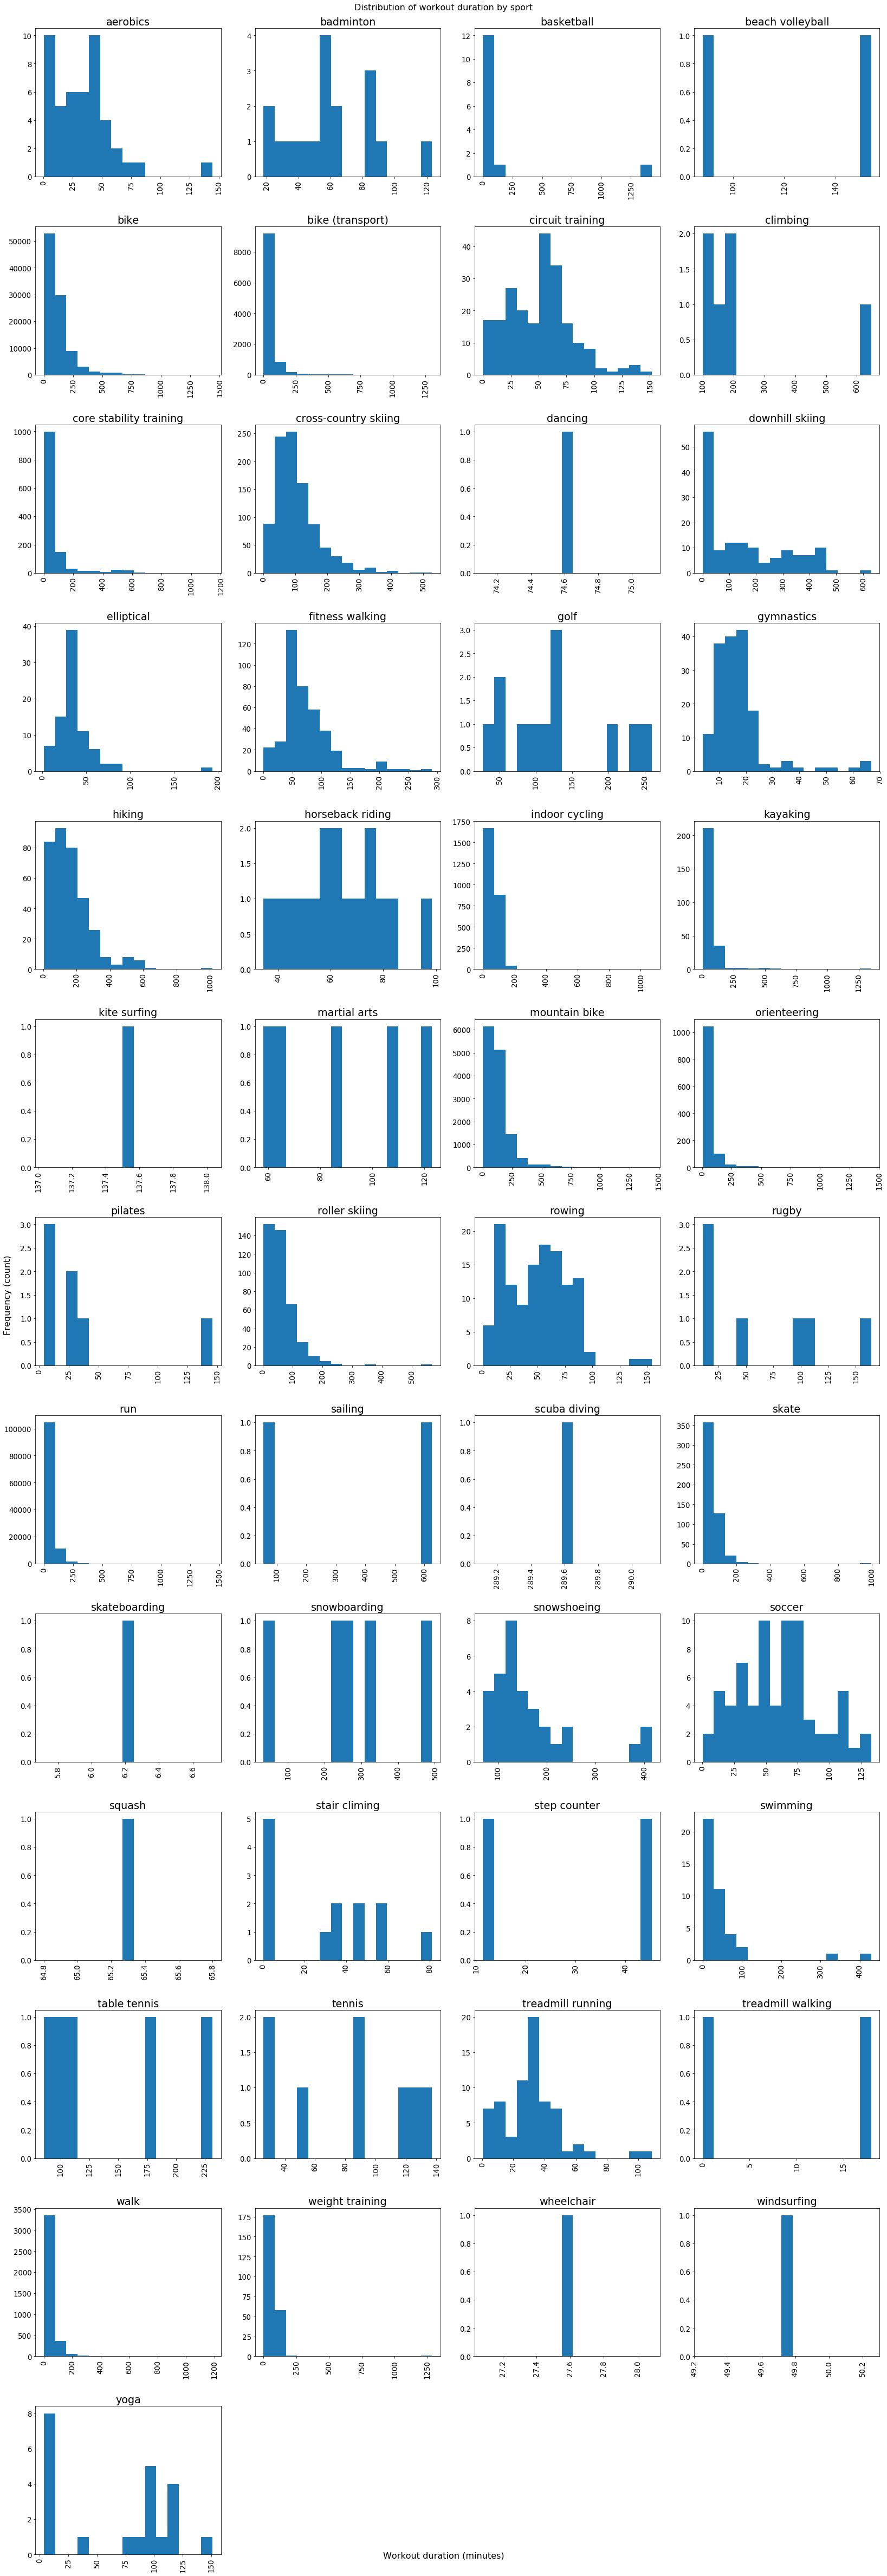

In [68]:

print('\nPlotting distribution of duration per sport type:')
plot_size_x, plot_size_y = 5, 5
figsize_x, figsize_y = plot_size_x * 4 +3, plot_size_y * 13 + 1
fig = plt.figure(figsize=(figsize_x, figsize_y)) #
grid_size = (13,4)
ax = plt.subplot2grid(grid_size, (0,0), colspan=1, rowspan=1)

duration_dist = df.select('duration', 'sport').toPandas().hist(
    column='duration', bins=15, sharex = False, grid=True, xlabelsize='small', ylabelsize='small', by='sport', ax = ax,
    layout = grid_size, figsize=(plot_size_x,plot_size_y)
    )
a = fig.tight_layout()
z = fig.text(0.5, 1, 'Distribution of workout duration by sport', ha='center', va='center', transform=fig.transFigure)
y = fig.text(0.5, 0.01, 'Workout duration (minutes)', ha='center', va='center', transform=fig.transFigure)
z =fig.text(0.01, 0.5, 'Frequency (count)', va='center', rotation='vertical')

#### 2) Workout record interval:
After `duration`, next we look at the `interval` column and have some statistics for it. Since the full list of interval is too large to have the boxplot (the best type of chart in *Matplotlib* for statistic description), we were only able to calculate the major statistics (min/max/mean/average/standar deviation and 4 quantiles 25th/50th/75th/95th) info in pySpark and plot them.

In [69]:
def calculate_stats(x):
    sport, interval_list = x
    min_interval = min(interval_list)
    max_interval = max(interval_list)
    average_interval = stats.mean(interval_list)
    median_interval = stats.median(interval_list)
    std_interval = stats.stdev(interval_list)
    percentile_25th_interval = np.percentile(interval_list, 25)
    percentile_75th_interval = np.percentile(interval_list, 75)
    percentile_95th_interval = np.percentile(interval_list, 95)
    return {'sport': sport, 'min interval' : min_interval 
            , '25th percentile interval': percentile_25th_interval
            , 'mean interval': average_interval, '50th interval (median)': median_interval
            , '75th percentile interval': percentile_75th_interval
            , '95th percentile interval': percentile_95th_interval
            , 'max interval': max_interval
            , 'stdev interval': std_interval
           }

def to_list(a):
    return a

def extend(a, b):
    a.extend(b)
    return a

# Convert sport & interval column to RDD to easily calculate the statistics of intervals by sports
sport_interval_rdd = df.select('sport', 'interval').rdd.map(tuple).combineByKey(to_list, extend, extend).persist()

# Calculate statistics of interval column by calling calculate_stats function defined above
interval_statistic_df = pd.DataFrame(sport_interval_rdd.map(lambda x: calculate_stats(x)).collect())
# Set proper dataframe column orders
columns_order = ['sport', 'min interval', '25th percentile interval',
                 'mean interval', '50th interval (median)', '75th percentile interval', '95th percentile interval',
                 'max interval', 'stdev interval']

# Re order columns
interval_statistic_df = interval_statistic_df[columns_order]
print('\nLet\'s look at statistic for interval, in seconds (by sport):' )
interval_statistic_df


Let's look at statistic for interval, in seconds (by sport):


sport  min interval  25th percentile interval  \
0                      walk             0                       3.0   
1                      yoga             0                       3.0   
2         treadmill running             0                       2.0   
3          bike (transport)             0                       3.0   
4                    soccer             0                       4.0   
5                  kayaking             0                       5.0   
6                      bike             0                       5.0   
7                      golf             0                       6.0   
8                    squash             2                       6.0   
9                    rowing             0                       4.0   
10             snowboarding             1                      11.0   
11         beach volleyball             0                      12.0   
12                      run             0                       4.0   
13                  pilates             1                       3.0   
14                   tennis             1                       5.0   
15            skateboarding             1                       1.0   
16             table tennis             1                       8.0   
17               gymnastics             0                       1.0   
18            roller skiing             0                       3.0   
19            stair climing             0                       3.0   
20             kite surfing            16                      16.0   
21             step counter             1                       7.0   
22              windsurfing             3                       3.0   
23             scuba diving            10                      21.0   
24               wheelchair             1                       4.0   
25                  sailing             1                       6.0   
26        treadmill walking             0                       2.0   
27               elliptical             0                       3.0   
28          weight training             0                       3.0   
29                 climbing             3                      14.0   
30          downhill skiing             0                       6.0   
31             orienteering             0                       5.0   
32                  dancing             2                      20.0   
33                 swimming             1                       3.0   
34     cross-country skiing             0                       6.0   
35                badminton             0                       4.0   
36             martial arts             0                       6.0   
37         horseback riding             0                       4.0   
38          fitness walking             0                       5.0   
39               basketball             1                       3.0   
40                    rugby             1                       3.0   
41                 aerobics             0                       3.0   
42         circuit training             0                       3.0   
43           indoor cycling             0                       5.0   
44                   hiking             0                       8.0   
45              snowshoeing             1                       9.0   
46            mountain bike             0                       6.0   
47  core stability training             0                       3.0   
48                    skate             0                       3.0   

    mean interval  50th interval (median)  75th percentile interval  \
0        7.915562                     5.0                      8.00   
1       18.114438                     7.0                     19.00   
2        5.513624                     4.0                      6.00   
3        8.529853                     5.0                      8.00   
4        7.579923                     6.0                      9.00   
5       11.859714                     7.0    

Now we plot those numbers in bar (for quantiles statistics) and line charts (for min/max/mean/stdev) for a more visualized feel.  
*Note: Due to the fact that the maximum interval and stdev have a much higher order of magnitude compared to the remaining columns, we need to put those 2 columns in a separate y axis on the right.*


Summarize statistics of interval sport:


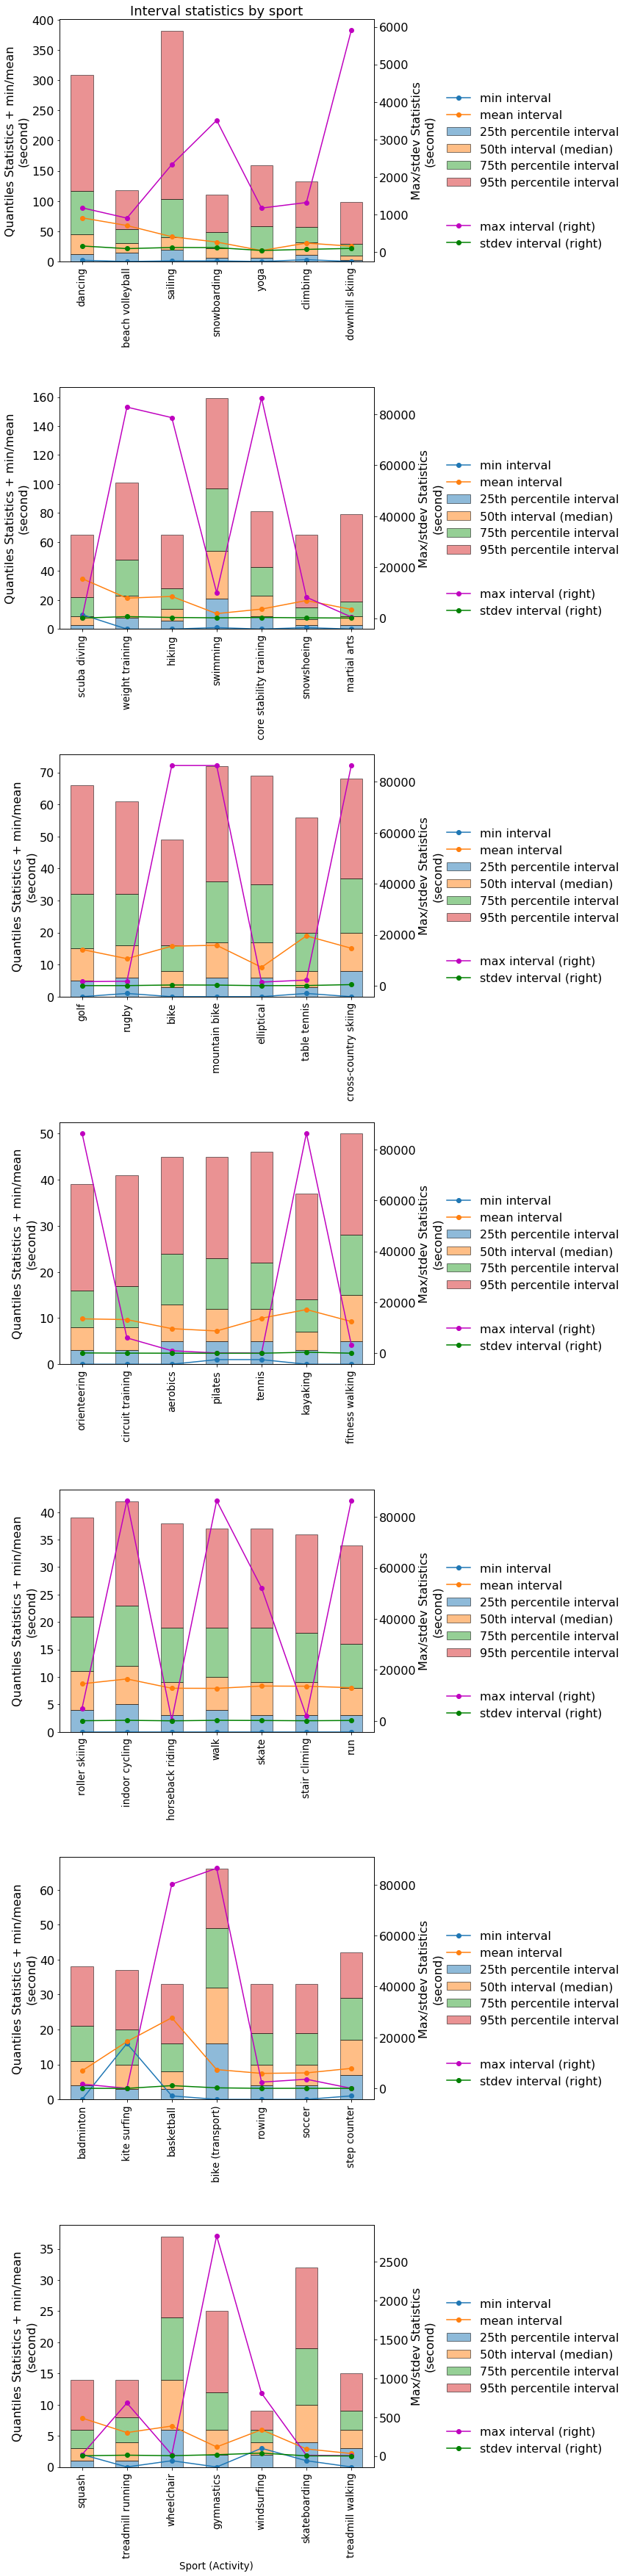

In [70]:
print('\nSummarize statistics of interval sport:')
bar_columns = ['25th percentile interval', '50th interval (median)', '75th percentile interval', '95th percentile interval']
line_columns1 = ['min interval', 'mean interval'] 
line_columns2 = ['max interval', 'stdev interval'] 
interval_statistic_df = interval_statistic_df.sort_values(by='95th percentile interval', ascending=False)
figsize=(13, 49)
fig, axs = plt.subplots(nrows=7, figsize=figsize)

d = axs[0].set_title('Interval statistics by sport', fontsize=18)
for i in range (7):
    interval_statistic_sub_df = interval_statistic_df.iloc[i*7:i*7+7,]
    #interval_statistic_sub_df
    plot1 = interval_statistic_sub_df[['sport'] + bar_columns].groupby(['sport']).agg(np.mean).plot(
        kind='bar', stacked=True, grid=False, alpha=0.5, edgecolor='black', ax=axs[i], 
    )
    plot2 = interval_statistic_sub_df[['sport'] + line_columns1].plot(x='sport', ax=axs[i], marker='o');
    ax2 = axs[i].twinx()
    plot3 = interval_statistic_sub_df[['sport'] + line_columns2].plot(x='sport', ax=ax2, marker='o', color=['m', 'g']);
    a = axs[i].legend(loc='center left', fontsize=16, bbox_to_anchor=(1.2, 0.5), frameon=False)
    a = ax2.legend(labels=['max interval (right)', 'stdev interval (right)']
                   , loc="center left", fontsize=16, bbox_to_anchor=(1.2, 0.11), frameon=False)
    b = axs[i].set_xticklabels(interval_statistic_sub_df['sport'],rotation = 'vertical', fontsize='small')
    c = axs[i].set_xlabel('Sport (Activity)', fontsize='small');
    d = axs[i].set_ylabel('Quantiles Statistics + min/mean\n(second)', fontsize=16);
    e = ax2.set_ylabel('Max/stdev Statistics\n(second)', fontsize=16)
    for tick in axs[i].yaxis.get_major_ticks():
        a = tick.label.set_fontsize(16) 
    ax2.tick_params(axis='y', labelsize=16)
    b = plt.setp([a.get_xticklabels() for a in fig.axes[:-1]], visible=True)

a = fig.tight_layout()
plt.show()


Looking at the quantiles statistic, up to 95% of the interval data set does not have the interval larger than 400 columns, while there are just a few outliers that made the maximum intervals reach up to 86400 (a full days). This is probably due to Edomondo data record issues.  

#### 7) Workout start time
Once again, we use histogram chart to look at the distribution of workouts' started hours, grouped by sport and broken down by gender. We divide a day into intervals of 2 hours, so there are totally 12 buckets. 

In [71]:
# Retrive the table of gender, sport and workout_start_time for plotting
start_time_df = df.select('gender', 'sport','workout_start_time').toPandas()


Plotting distribution of workout start time per sport type, break down by gender:


<Figure size 1800x5688 with 0 Axes>

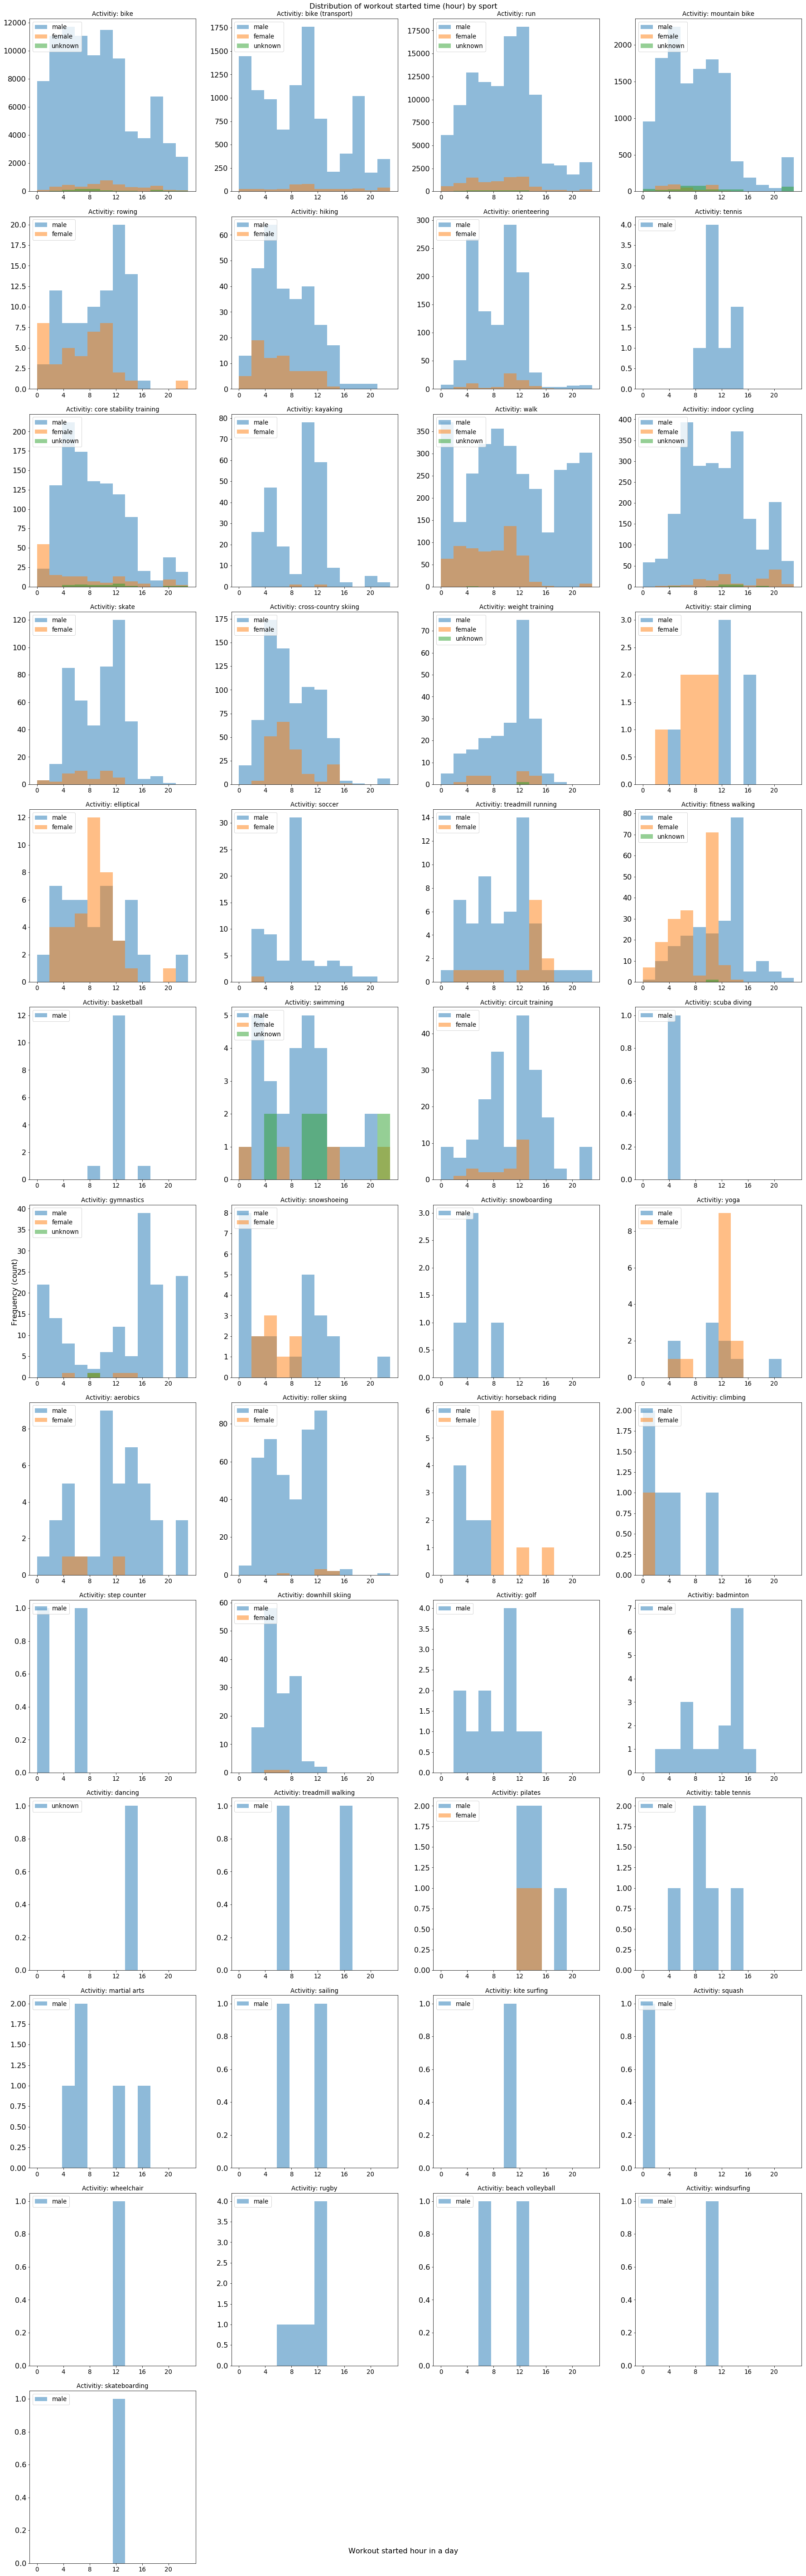

In [72]:
activities = start_time_df['sport'].unique()
plot_size_x, plot_size_y = 5, 5
figsize_x, figsize_y = (plot_size_x + 0.5) * 4 +3, (plot_size_y + 1) * 13 + 1
a = plt.figure(figsize=(figsize_x, figsize_y)) 

nrows, ncols = 13, 4
a = fig.subplots_adjust(hspace = 1, wspace = 1)
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(figsize_x, figsize_y))
print('\nPlotting distribution of workout start time per sport type, break down by gender:')
a = plt.setp(axs, xticks=[0, 4, 8, 12, 16, 20])
for index, sport in enumerate(activities):
    row_index, col_index = divmod(index, ncols)
    # = index - row_index * ncols
    male_start_time_list = start_time_df[(start_time_df.sport == sport) & 
                                            (start_time_df.gender == 'male')]['workout_start_time']
    female_start_time_list = start_time_df[(start_time_df.sport == sport) & 
                                            (start_time_df.gender == 'female')]['workout_start_time']
    unknown_start_time_list = start_time_df[(start_time_df.sport == sport) & 
                                            (start_time_df.gender == 'unknown')]['workout_start_time']
    if len(male_start_time_list) > 0:
        male_dist = axs[row_index, col_index].hist(male_start_time_list,
                                      bins = 12, alpha=0.5, label='male', range=(0, 23))
    if len(female_start_time_list) > 0:    
        female_dist = axs[row_index, col_index].hist(female_start_time_list,
                                      bins = 12, alpha=0.5, label='female', range=(0, 23))
    if len(unknown_start_time_list) > 0:
        unknown_dist = axs[row_index, col_index].hist(unknown_start_time_list,
                                      bins = 12, alpha=0.5, label = 'unknown', range=(0, 23))
    b= axs[row_index, col_index].set_title('Activitiy: ' + sport, fontsize='small')
    a = axs[row_index, col_index].legend(loc="upper left", fontsize='small')
    a = plt.setp(axs[row_index, col_index].get_xticklabels(), fontsize='small')

for i in range(1,4):
    x = axs[12, i].set_visible(False)
a = fig.tight_layout()
z = fig.text(0.5, 1, 'Distribution of workout started time (hour) by sport'
             , ha='center', va='top', transform=fig.transFigure)
y = fig.text(0.5, 0.01, 'Workout started hour in a day', ha='center', va='bottom', transform=fig.transFigure)
z = fig.text(0.02, 0.5, 'Frequency (count)', va='center', rotation='vertical')

From the distribution charts above, it can be seen that most of the sports have activities started either in the morning or eveneing (bimodal distribution), which does make sense. There are a few activities happening during the timeframe of 0-4 o'clock, which is quite odd.  
<br />

### D. Look deeper into row level information

#### 1) Next, we will have a first look at the heart rate for each workout. 
*Due to the huge amount of users and workout numbers, we just picked randomly up to a x number of users per gender (ex, 5), and up to y workouts per activity type (ex, 10).<br />
Based on the plot, we can see that the raw data is quite messy, even a few workouts have heart rate records of 0 (!!!). So we know that there must be some data cleaning job to be done.*

In [73]:
# Support function helping to sample data
def sampling_data(max_users_per_gender, max_workouts_per_sport):
    '''
        max_users_per_gender: maximum number of user to be selected randomly per gender
        max_workouts_per_sport: maximum number of activities to be selected per sport (the sports existing in selected users)
    '''
    # Get unique list of userId and gender, for sampling purpose
    users_genders = df.select('userId', 'gender').distinct().toPandas()
    # Use 'sample' function to pick up to 3 userId per gender from the unique userId list
    random_x_users_per_gender = users_genders.groupby('gender')['userId'].apply(
                lambda s: s.sample(min(len(s), max_users_per_gender))
    )

    # Apply filter on the main pyspark dataframe for sampling
    samples_by_gender = df.where(df.userId.isin(list(random_x_users_per_gender)))

    # Next, generate the unique activity ids and sport types list from the sampled data set 
    workout_sports = samples_by_gender.select('id', 'sport').distinct().toPandas()
    # Use 'sample' function to pick up to 10 activity ids for each kind of sport 
    random_y_workouts_per_sport = workout_sports.groupby('sport')['id'].apply(
        lambda s: s.sample(min(len(s), max_workouts_per_sport))
    )

    # Apply filter to the sampled dataset to continue reduce the number of workouts per activity type
    samples_by_gender_and_sport = samples_by_gender.where(df.id.isin(list(random_y_workouts_per_sport)))
    return samples_by_gender_and_sport

In [74]:
# Use 2 variable to determine the sampling criteria: maximum users per gender and maximum workouts per sport
max_users_per_gender, max_workouts_per_sport = 20, 15
# Collect the sampled data set to Pandas to be used with plot features
pd_df = sampling_data(max_users_per_gender, max_workouts_per_sport).toPandas()
print('\nSampled data overview (only string and numeric columns):')
pd_df.describe()


Sampled data overview (only string and numeric columns):


id        userId  PerWorkoutRecordCount  workout_start_time  \
count  2.400000e+02  2.400000e+02             240.000000          240.000000   
mean   3.739387e+08  5.606040e+06             394.300000            9.216667   
std    1.414074e+08  3.041794e+06             160.505014            4.872746   
min    5.430028e+07  7.225280e+05               2.000000            0.000000   
25%    2.850487e+08  3.961631e+06             296.000000            5.000000   
50%    3.713889e+08  4.796418e+06             500.000000           10.000000   
75%    4.752529e+08  8.899244e+06             500.000000           13.000000   
max    6.437873e+08  1.255544e+07             500.000000           23.000000   

         duration  
count  240.000000  
mean    90.315483  
std    110.306030  
min      0.133333  
25%     30.945834  
50%     57.683332  
75%    112.612497  
max    658.116638

All sampling have been done, let's plot heart rate on the sample data set! <br />
*Note: from this first look, the heart rate and workout time of a day is quite varied per user and activity.<br />
In the first plot, we keep the original datetime value, but the result could not give much meaning since the activities of all users happened at different timeframes.<br />
In the second plot, we convert the datetime to time value (hour: minute: second) to use for the plot so all heart rate trends only vary within the 24 hours of a day. This second plot has a limitation that it will not display correctly the workouts that last from 1 night to the next day.*

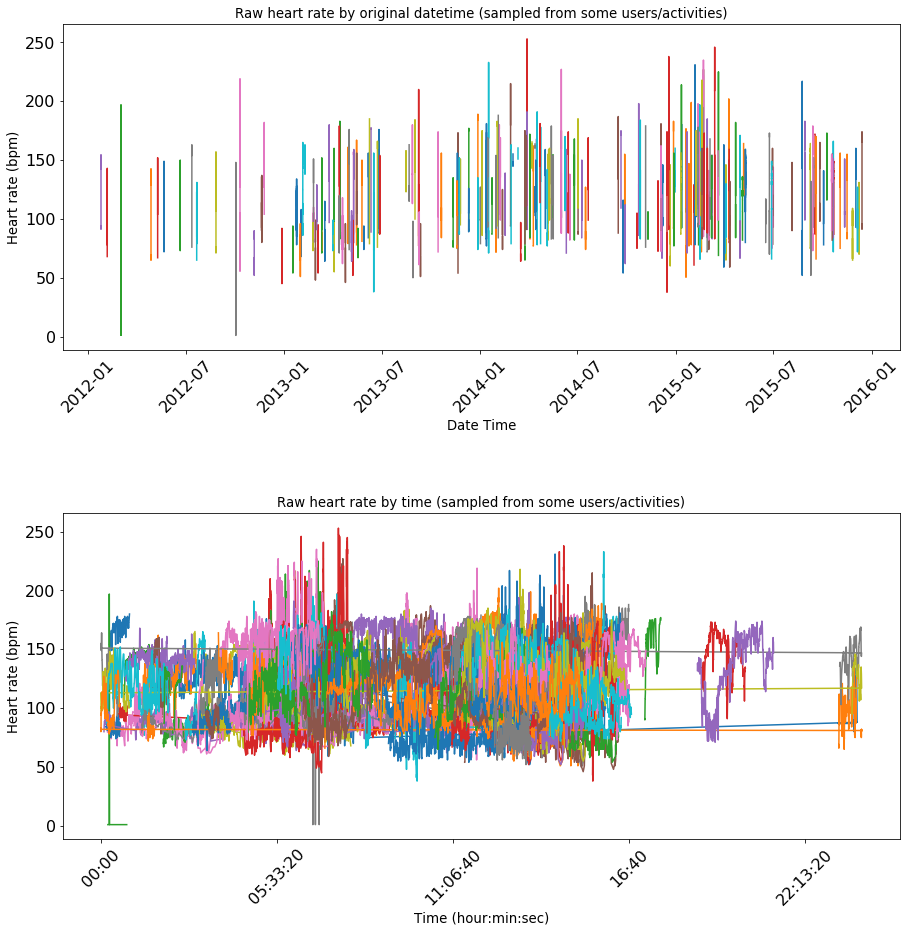

In [75]:
fig, axs = plt.subplots(2, figsize=(15, 15))
#fig = plt.figure(figsize=(20, 10))
a = fig.subplots_adjust(hspace = 0.5)
pd_df_temp = pd_df
for index,data_row in pd_df_temp.iterrows():
    #data_row['date_time'] = [date_time.time() for date_time in data_row['date_time']]
    label = 'user: ' + str(data_row['userId']) + ' - sport: ' + data_row['sport']
    a= axs[0].plot(data_row['date_time'], data_row['heart_rate'], label=label)
    # Convert datetime to time to plot the second chart:
    data_row['date_time'] = [date_time.time() for date_time in data_row['date_time']]
    b= axs[1].plot(data_row['date_time'], data_row['heart_rate'], label=label)
a = axs[0].set_title('Raw heart rate by original datetime (sampled from some users/activities)',fontsize='small')
a = axs[1].set_title('Raw heart rate by time (sampled from some users/activities)',fontsize='small')
#d = c.set_rotation(45)
b = plt.setp(axs[0].get_xticklabels(), rotation=45)
b = plt.setp(axs[1].get_xticklabels(), rotation=45)
#b = plt.xticks(rotation='vertical', fontsize='small')
#c = plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), prop={'size': 8})
a= axs[0].set_ylabel('Heart rate (bpm)', fontsize='small')
a= axs[1].set_ylabel('Heart rate (bpm)', fontsize='small')
b= axs[0].set_xlabel('Date Time', fontsize='small')
b= axs[1].set_xlabel('Time (hour:min:sec)', fontsize='small')


*Even from the 2 messy plots above, we can see there are some record with zero heart rate and some workouts have missing data in the middle. **So the next filtering step will be to remove workouts containing zero hear rate** [2]*

<br />

#### 2) Continue looking on a normalized timestamp

*The plot above still did not give a good visualization of heart rate. So next step, we will need to normalize the time for all workouts by calulating the duration (in seconds) of each timestamp record from the first record of a workout (the first datetime element of the list in that workout). <br />
Then we plot the heart rate on this normalized time, grouping by sport.*

New normalized datetime (first 7 rows):


userId                    sport  \
0    897592           indoor cycling   
1   9613679          weight training   
2   9613679  core stability training   
3  11258520                     walk   
4   3556695          weight training   
5   3556695                   rowing   
6   3556695                   rowing   

                                           date_time  \
0  [2014-04-13 05:34:26, 2014-04-13 05:34:27, 201...   
1  [2013-04-29 13:30:42, 2013-04-29 13:30:44, 201...   
2  [2013-04-03 11:09:17, 2013-04-03 11:09:18, 201...   
3  [2015-02-04 12:56:22, 2015-02-04 12:56:30, 201...   
4  [2015-11-11 14:08:47, 2015-11-11 14:08:53, 201...   
5  [2015-08-05 11:03:31, 2015-08-05 11:03:32, 201...   
6  [2015-07-01 12:02:12, 2015-07-01 12:02:13, 201...   

                                normalized_date_time  
0  [0, 1, 5, 10, 12, 15, 24, 34, 40, 52, 73, 167,...  
1  [0, 2, 5, 12, 22, 31, 40, 43, 53, 62, 72, 78, ...  
2  [0, 1, 9, 17, 20, 28, 37, 45, 60, 64, 66, 76, ...  
3  [0, 8, 16, 24, 32, 41, 49, 57, 65, 74, 82, 90,...  
4  [0, 6, 27, 41, 51, 64, 74, 83, 104, 109, 112, ...  
5  [0, 1, 3, 6, 12, 13, 15, 19, 21, 22, 23, 25, 3...  
6  [0, 1, 20, 22, 27, 29, 32, 33, 37, 43, 45, 56,...


Plot raw heart rate (sampled) by normalized time:


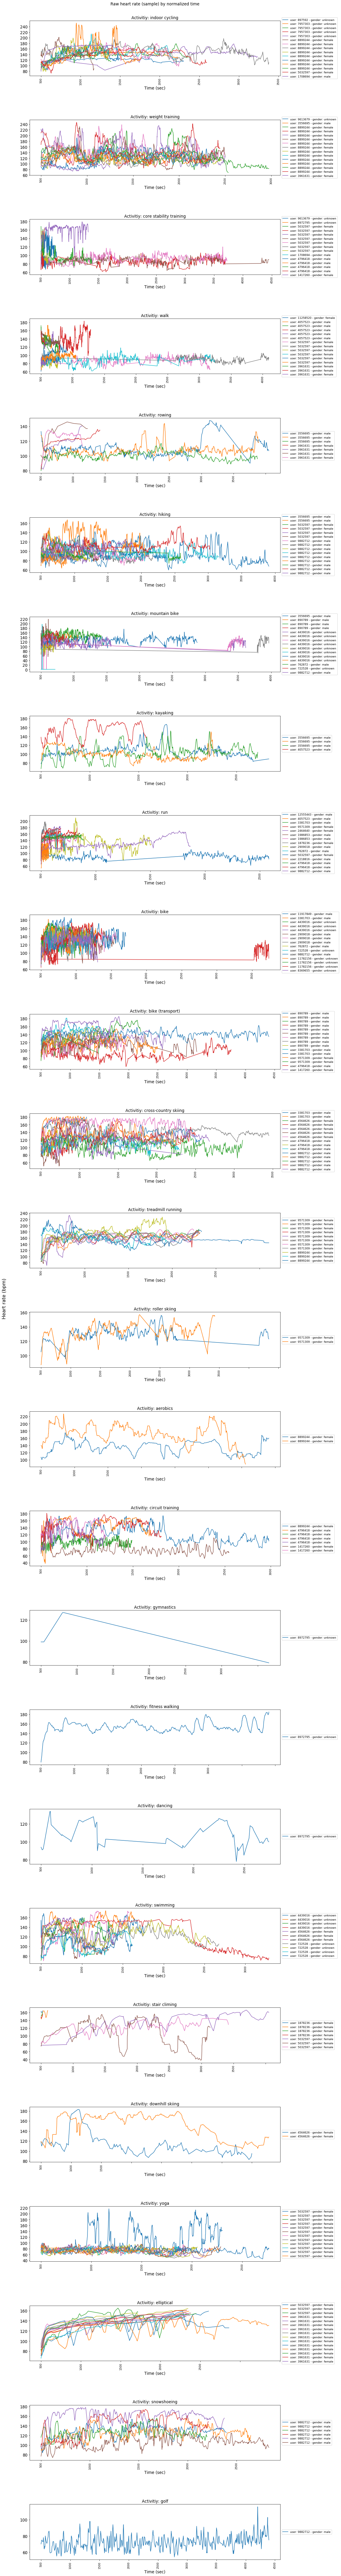

In [76]:

#def calculate_normalized_datetime(row):
#    min_datetime = row['date_time']
#    return [date_time - min_datetime for date_time in row.date_time]

flattern = lambda l: set([item for sublist in l for item in sublist])

normalized_datetime_list = []
for index,data_row in pd_df.iterrows():
    min_date_time = min(data_row['date_time'])
    normalized_datetime_list.append([(date_time - min_date_time).seconds for date_time in data_row['date_time']])

pd_df['normalized_date_time'] = normalized_datetime_list

print('New normalized datetime (first 7 rows):')
pd_df.head(7)[['userId', 'sport', 'date_time','normalized_date_time']]

print('\nPlot raw heart rate (sampled) by normalized time:')

sport_list = pd_df['sport'].unique()
# Define the length of the figure dynamically depends on the length of the sport list
fig, axs = plt.subplots(len(sport_list), figsize=(15, 6*len(sport_list)))
a = fig.subplots_adjust(hspace = 0.8)
c = plt.setp(axs, yticks=range(0,250,20))

for sport_index, sport in enumerate(sport_list):
    workout = pd_df[pd_df.sport == sport]
    max_time = max(flattern(workout.normalized_date_time))
    for workout_index, data_row in workout.iterrows():
        label = 'user: ' + str(data_row['userId']) + ' - gender: ' + data_row['gender']
        a= axs[sport_index].plot(data_row['normalized_date_time'], data_row['heart_rate'], label=label)
    b= axs[sport_index].set_title('Activitiy: ' + sport, fontsize='small')
    b= axs[sport_index].set_xlabel('Time (sec)', fontsize='small')
    a = axs[sport_index].set_xticklabels(range(0, max_time, 500),rotation = 'vertical', fontsize=9)
    b = axs[sport_index].set_yticklabels(range(0,250,20),fontsize='small')
    c = axs[sport_index].legend(loc='center left', bbox_to_anchor=(1.0, 0.5), prop={'size': 9})

z =fig.text(0.04, 0.5, 'Heart rate (bpm)', va='center', rotation='vertical')
z =fig.text(0.5, 1.3, 'Raw heart rate (sample) by normalized time', 
            ha='center', va='center', fontsize='small', transform=axs[0].transAxes)


### E. Workout displacements


In [77]:
pd_df_small = sampling_data(max_users_per_gender=2, max_workouts_per_sport=2).toPandas()
print('Sampled data (2 user, 2 workouts per sport):')
pd_df_small[['userId', 'gender','sport','id', 'workout_start_time'
             ,'duration', 'duration', 'longitude', 'latitude', 'altitude']]

Sampled data (2 user, 2 workouts per sport):


userId   gender                    sport         id  workout_start_time  \
0    1663599     male                     walk  257469626                  17   
1    1663599     male                     walk  245980873                   3   
2    5210077   female         bike (transport)  527611969                  17   
3    5210077   female         bike (transport)  527384316                   9   
4    5210077   female                     bike  362105841                   8   
5   12747285  unknown            mountain bike  326001041                   3   
6   12747285  unknown            mountain bike  262986400                   5   
7   11782156  unknown  core stability training  638453870                  23   
8   11782156  unknown                      run  630978377                  19   
9   11782156  unknown  core stability training  554519513                  20   
10  11782156  unknown                      run  532073837                  19   
11  11782156  unknown                     bike  437689638                  18   

      duration    duration                                          longitude  \
0    11.850000   11.850000  [126.92378936335444, 126.92380428314209, 126.9...   
1    48.950001   48.950001  [127.65742926858366, 127.65732457861304, 127.6...   
2    54.883335   54.883335  [-77.0135208684951, -77.0135208684951, -77.013...   
3    71.433334   71.433334  [-77.19626924023032, -77.19630653969944, -77.1...   
4    83.750000   83.750000  [-77.09405343979597, -77.09405226632953, -77.0...   
5   234.866669  234.866669  [-0.10400701314210892, -0.10400701314210892, -...   
6   337.733337  337.733337  [-0.20918866619467735, -0.20977238193154335, -...   
7     4.516667    4.516667  [98.29840541817248, 98.29838873818517, 98.2983...   
8    42.566666   42.566666  [98.4011491946876, 98.40115296654403, 98.40114...   
9     5.300000    5.300000  [100.49612324684858, 100.49611813388765, 100.4...   
10   44.116665   44.116665  [98.33310222253203, 98.33308420144022, 98.3330...   
11  295.816681  295.816681  [98.38548358529806, 98.38435085490346, 98.3812...   

                                             latitude  \
0   [37.521516205742955, 37.52151092514396, 37.521...   
1   [37.82417248003185, 37.82420885749161, 37.8242...   
2   [38.89331608079374, 38.89331608079374, 38.8933...   
3   [38.865142073482275, 38.86496747843921, 38.864...   
4   [38.84976362809539, 38.84970520623028, 38.8496...   
5   [38.58035744167864, 38.58035744167864, 38.5804...   
6   [38.88653235509992, 38.886886071413755, 38.887...   
7   [7.997792735695839, 7.997779659926891, 7.99776...   
8   [7.863660911098123, 7.86367398686707, 7.863718...   
9   [13.76987686380744, 13.769880887120962, 13.769...   
10  [7.89122287184, 7.89122044108808, 7.8912013303...   
11  [7.8742302395403385, 7.874140301719308, 7.8740...   

                                             altitude  
0   [5.4, 5.4, 5.4, 5.4, 5.4, 5.4, 5.4, 5.4, 5.4, ...  
1   [0.0, 1.6, 1.6, 1.6, 1.6, 1.6, 1.6, 1.6, 1.6, ...  
2   [-0.4, -0.2, -0.2, 0.0, 0.4, 0.4, 0.0, -1.0, -...  
3   [101.4, 102.4, 102.4, 103.6, 104.2, 104.0, 104...  
4   [56.1973, 56.1973, 55.9973, 55.7973, 54.9973, ...  
5   [68.0, 70.0, 72.4, 75.6, 79.0, 82.0, 85.0, 88....  
6   [121.6, 121.0, 120.0, 117.4, 116.6, 118.2, 118...  
7   [18.2, 18.4, 18.4, 18.4, 18.6, 18.8, 18.8, 19....  
8   [-8.8, -8.8, -8.4, -8.8, -9.0, -9.0, -9.0, -8....  
9   [-218.8, -218.6, -218.2, -157.0, -70.0, -26.0,...  
10  [51.4, 51.4, 51.2, 51.8, 51.6, 51.8, 51.8, 51....  
11  [18.6, 18.2, 18.8, 18.8, 19.2, 17.2, 17.2, 19....

Plot workout path in 3D graphs per each workout:


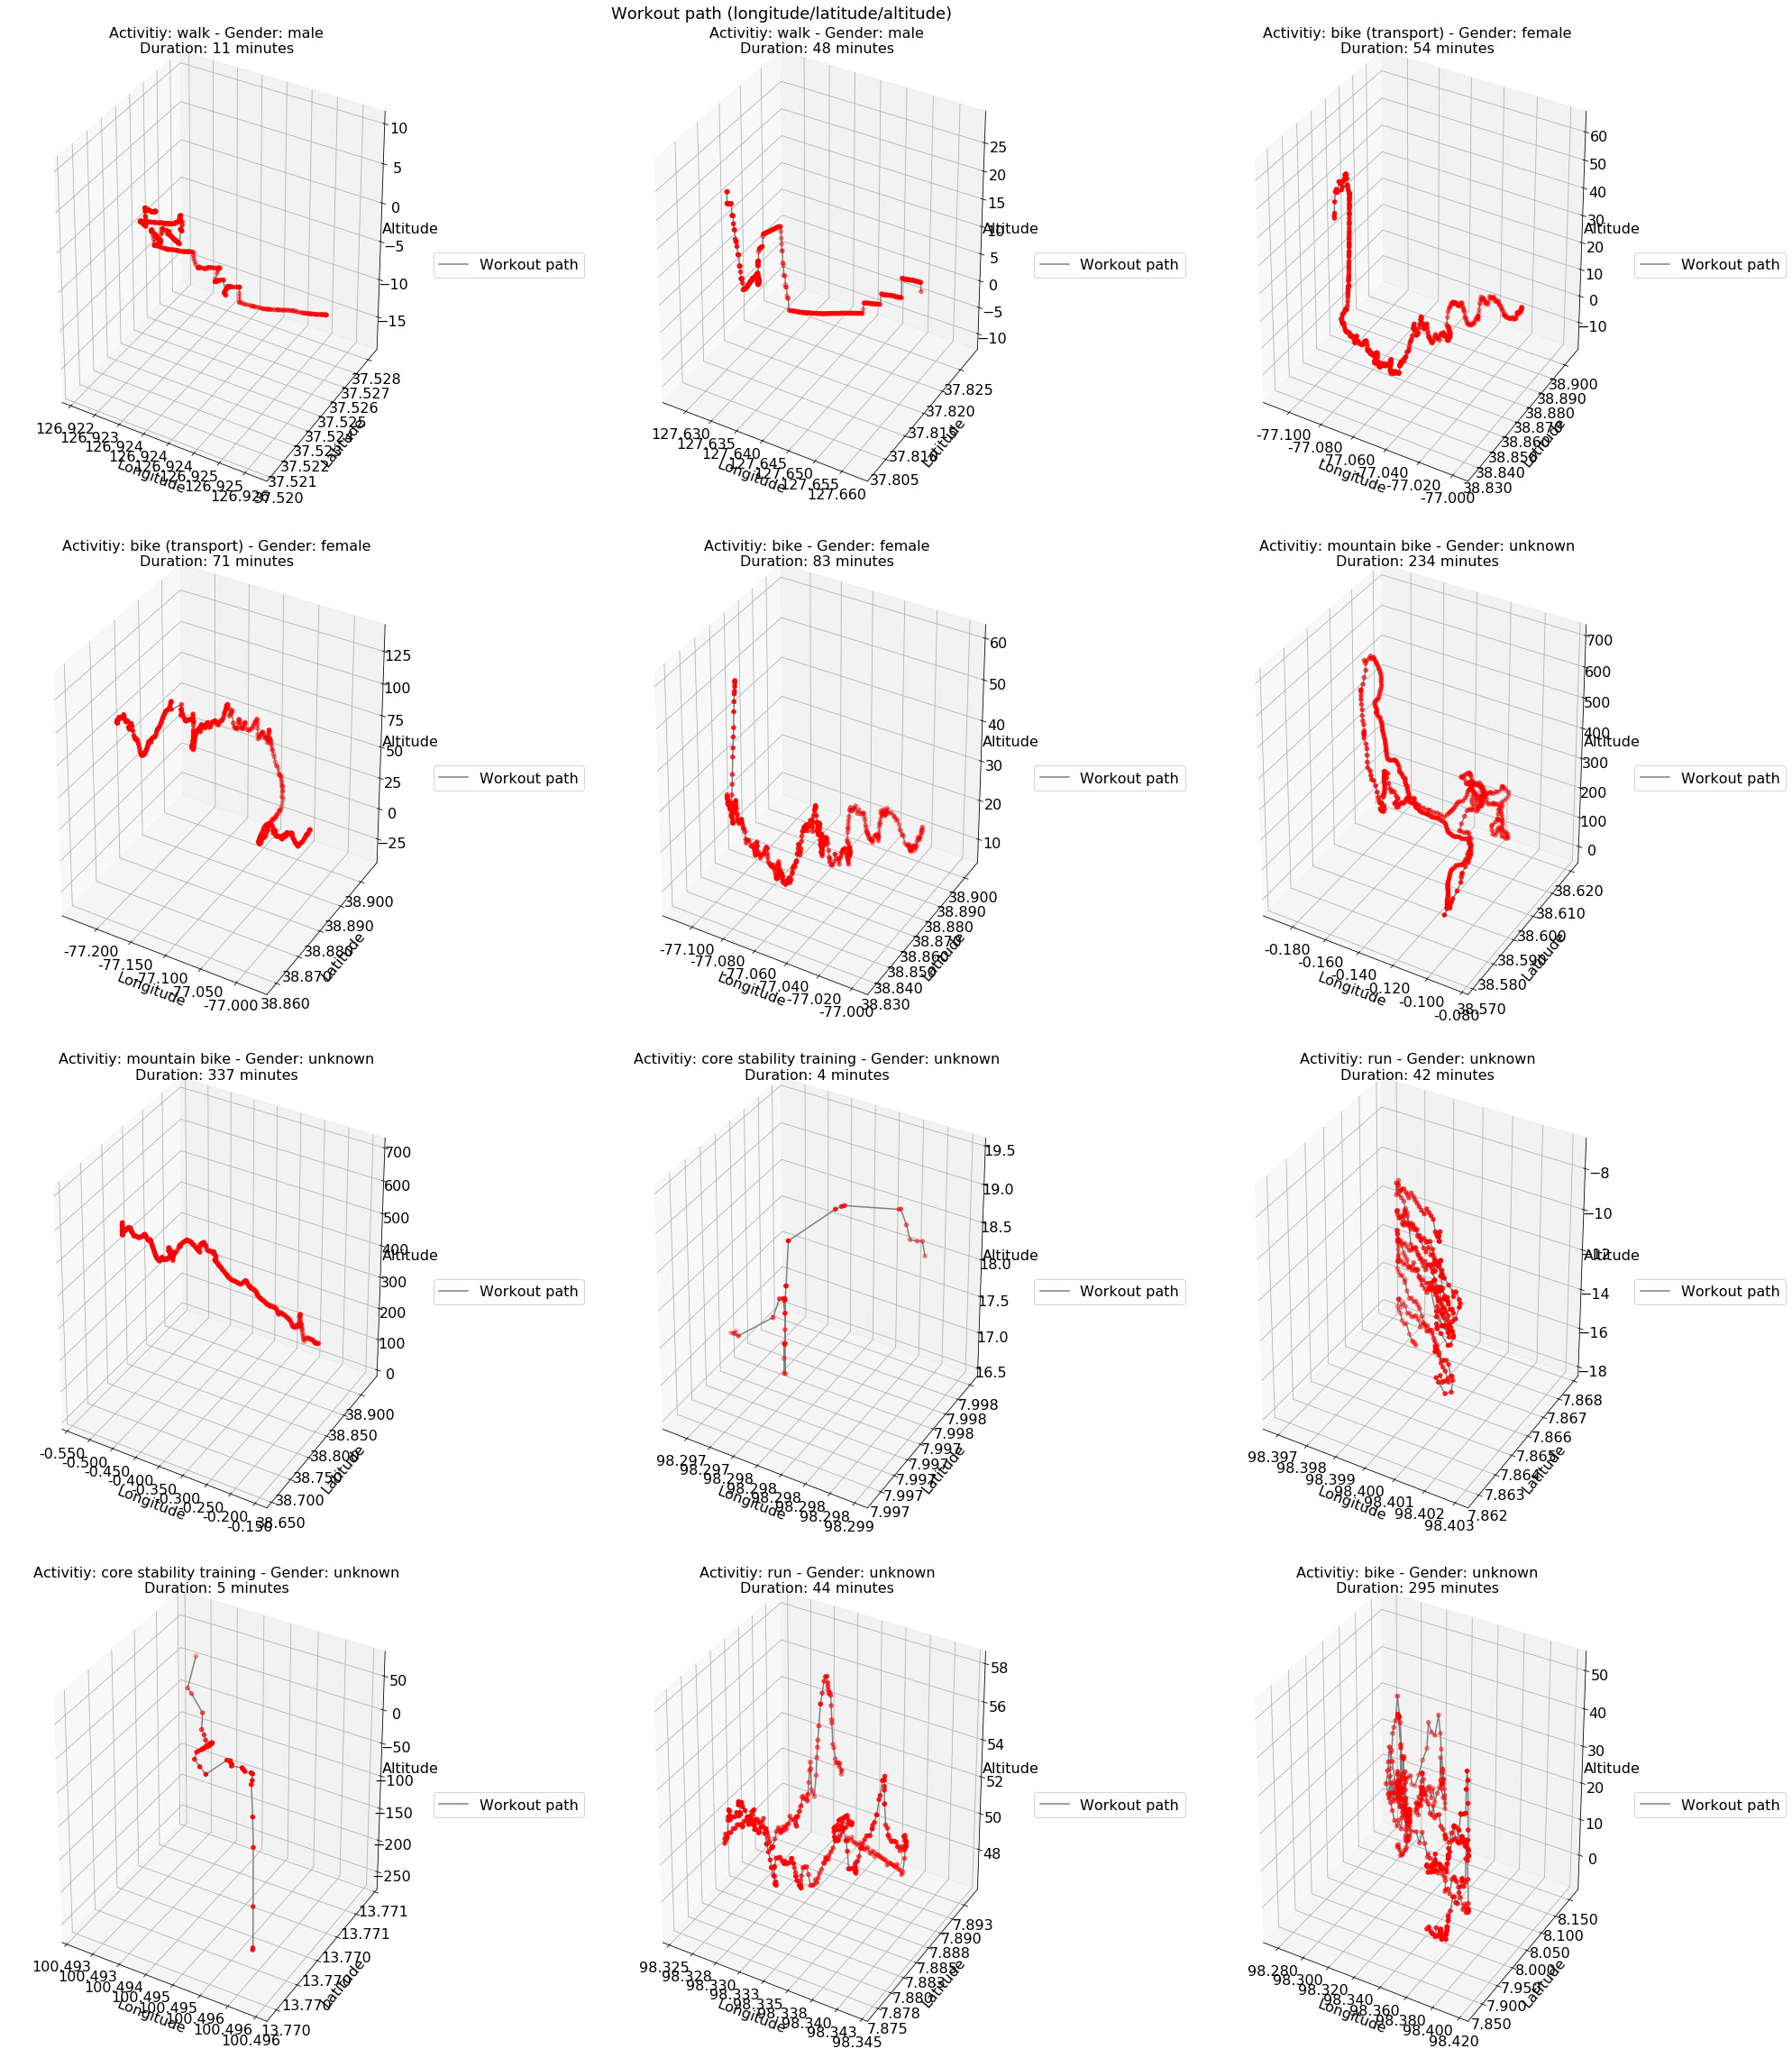

In [78]:
#pd_df_small[['userId', 'gender','sport','id', 'workout_start_time','duration', 'longitude', 'latitude', 'altitude']]
def get_fixed_mins_maxs(mins, maxs):
    deltas = (maxs - mins) / 12.
    mins = mins + deltas / 4.
    maxs = maxs - deltas / 4.

    return [mins, maxs]

from mpl_toolkits.mplot3d import Axes3D
workout_count = pd_df_small.shape[0]
ncols = 3
nrows = math.ceil(workout_count/ncols)
#workout_count
fig = plt.figure(figsize=(8 * (ncols + 0.5), 8*nrows))

a = fig.subplots_adjust(hspace = 0.2, wspace=0.5)
#c = plt.setp(axs, yticks=range(0,250,20))

print('Plot workout path in 3D graphs per each workout:')
for row_index, row in pd_df_small.iterrows():
    if row_index==2:
        text = ax.text2D(0.01, 1, "Workout path (longitude/latitude/altitude)", fontsize=18, transform=ax.transAxes)
    min_long = min(row['longitude']) - stats.stdev(row['longitude'])
    max_long = max(row['longitude']) + stats.stdev(row['longitude'])
    minmax_long = get_fixed_mins_maxs(min_long, max_long)
    #minmax_long
    min_lat = min(row['latitude']) - stats.stdev(row['latitude'])
    max_lat = max(row['latitude']) + stats.stdev(row['latitude'])
    minmax_lat = get_fixed_mins_maxs(min_lat, max_lat)
    #minmax_lat
    min_alt = min(row['altitude']) - stats.stdev(row['altitude'])
    max_alt = max(row['altitude']) + stats.stdev(row['altitude'])
    minmax_alt = get_fixed_mins_maxs(min_alt, max_alt)
    #minmax_alt
    ax = fig.add_subplot(nrows, ncols, row_index + 1, projection='3d')
    title = 'Activitiy: ' + row['sport'] + ' - Gender: ' + row['gender'] \
        + '\nDuration: ' + str(int(row['duration'])) + ' minutes'
    c = ax.set_title(title, fontsize=16)
    a = ax.scatter(row['longitude'], row['latitude'], row['altitude'], c='r', marker='o')
    b = ax.plot3D(row['longitude'],row['latitude'], row['altitude'], c='gray', label='Workout path')
    x_label = ax.set_xlabel('Longitude', fontsize=16)
    y_label = ax.set_ylabel('Latitude', fontsize=16)
    z_label = ax.set_zlabel('Altitude', fontsize=16, rotation = 0)
    for t in ax.xaxis.get_major_ticks():
        a = t.label.set_fontsize(16)
    for t in ax.yaxis.get_major_ticks():
        a = t.label.set_fontsize(16)
    for t in ax.zaxis.get_major_ticks():
        a = t.label.set_fontsize(16)
    b = ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    ax.zaxis.set_rotate_label(False)
    #b = plt.setp(ax.get_xticklabels(), rotation=41)
    #b = plt.setp(ax.get_yticklabels(), rotation=-30)
    plt.gca().xaxis.set_major_formatter(mtick.FormatStrFormatter('%.3f'))
    plt.gca().yaxis.set_major_formatter(mtick.FormatStrFormatter('%.3f'))
    ax.pbaspect = [4, 2, 0.5]
    xlims = ax.set_xlim(minmax_long)
    ylims = ax.set_ylim(minmax_lat)
    if minmax_alt[0] != minmax_alt[1]: zlims = ax.set_zlim(minmax_alt)
    # Do this trick to enable tight_layout for 3D plot:
    for spine in ax.spines.values():
        b = spine.set_visible(False)
plt.rcParams['legend.fontsize'] = 16
a = plt.tight_layout()
plt.show()

[1]: Applying filtering to remove rows that have less that 50 records

[2] Apply filtering to remove all rows containing zero heart rate